<a href="https://colab.research.google.com/github/sashachereshnya-pixel/compling2025/blob/main/%D0%A7%D0%95%D0%A0%D0%95%D0%92%D0%98%D0%9A_sklearn_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Импорт необходимых библиотек
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Для воспроизводимости
torch.manual_seed(42)
np.random.seed(42)

- `numpy` - для работы с многомерными массивами
- `pandas` - для работы с табличными данными
- `torch` - основной фреймворк для нейронных сетей
- `nn` - модуль для создания нейросетевых слоев
- `optim` - модуль с оптимизаторами (Adam, SGD и др.)
- `CountVectorizer` - для преобразования текста в мешок слов
- `train_test_split` - для разделения данных на обучающую и тестовую выборки

Изучите документацию

1. Импортируйте дополнительные метрики из sklearn: `precision_score`, `recall_score`, `f1_score`
2. Изучите документацию по `torch.manual_seed()` - зачем нужна фиксация random seed?

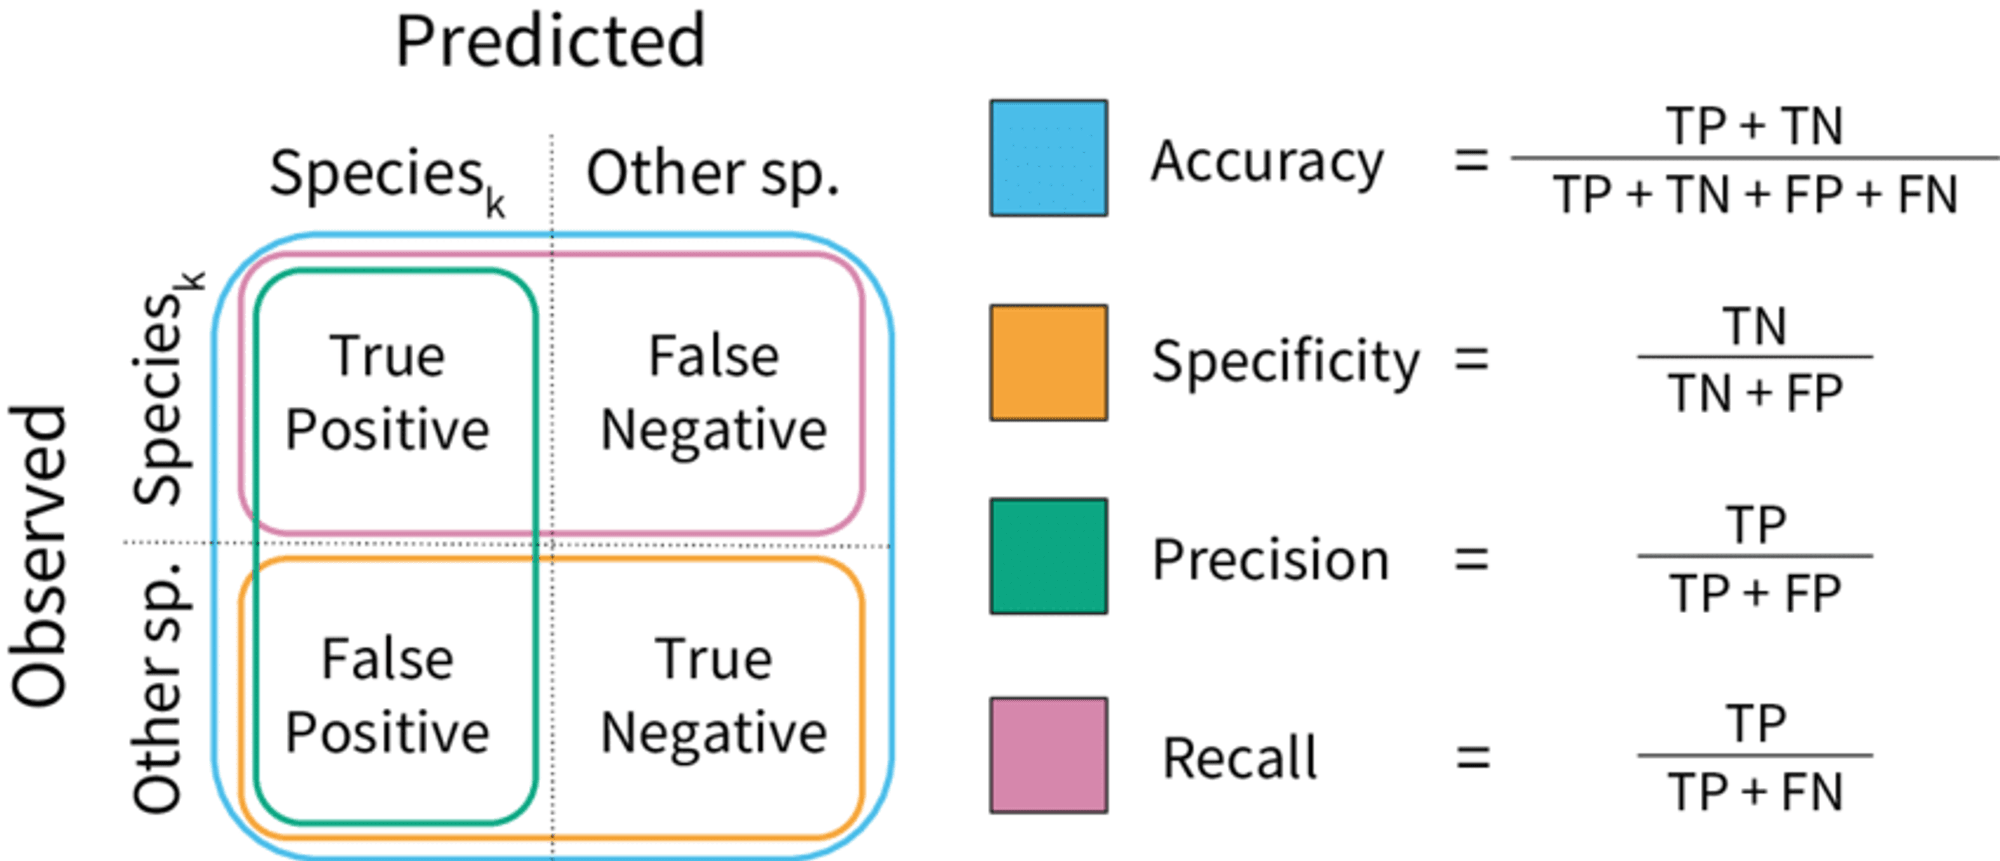

In [2]:
# Создадим простой датасет с отзывами
reviews = [
    "отличный товар очень доволен",
    "ужасное качество не рекомендую",
    "прекрасный продукт стоит своих денег",
    "кошмарный сервис никогда больше",
    "отлично работает спасибо",
    "плохая покупка зря потратил деньги",
    "великолепно советую всем",
    "некачественный товар разочарован",
    "супер быстрая доставка",
    "долго ждал заказ недоволен"
]

# Метки: 1 - позитивный, 0 - негативный
labels = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0]

print("Примеры данных:")
for i, (review, label) in enumerate(zip(reviews, labels)):
    print(f"{i+1}. {review} -> {'Позитивный' if label == 1 else 'Негативный'}")

Примеры данных:
1. отличный товар очень доволен -> Позитивный
2. ужасное качество не рекомендую -> Негативный
3. прекрасный продукт стоит своих денег -> Позитивный
4. кошмарный сервис никогда больше -> Негативный
5. отлично работает спасибо -> Позитивный
6. плохая покупка зря потратил деньги -> Негативный
7. великолепно советую всем -> Позитивный
8. некачественный товар разочарован -> Негативный
9. супер быстрая доставка -> Позитивный
10. долго ждал заказ недоволен -> Негативный


1. Добавьте 5 новых отзывов в датасет
2. Измените соотношение позитивных/негативных отзывов
3. Проанализируйте, как это повлияло на качество модели

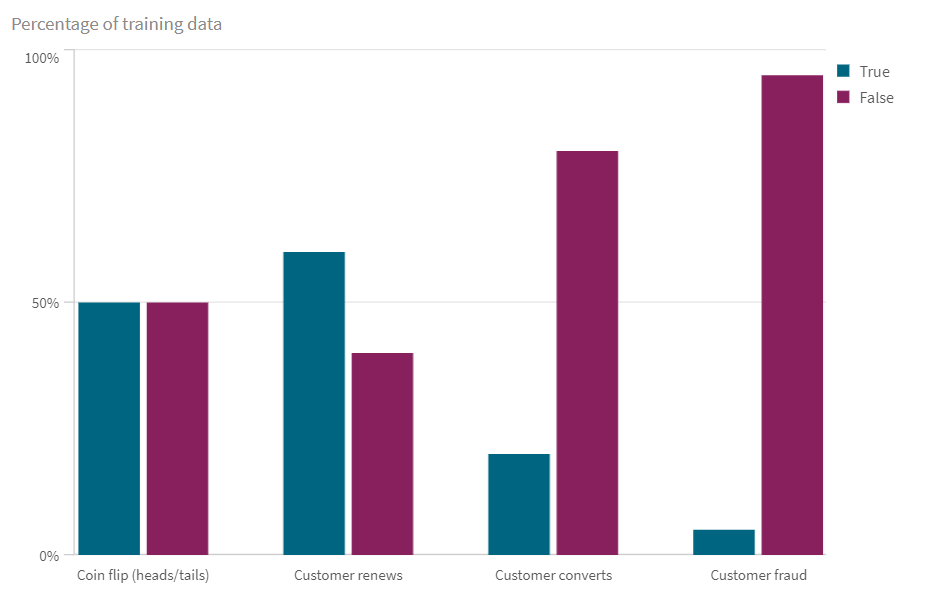

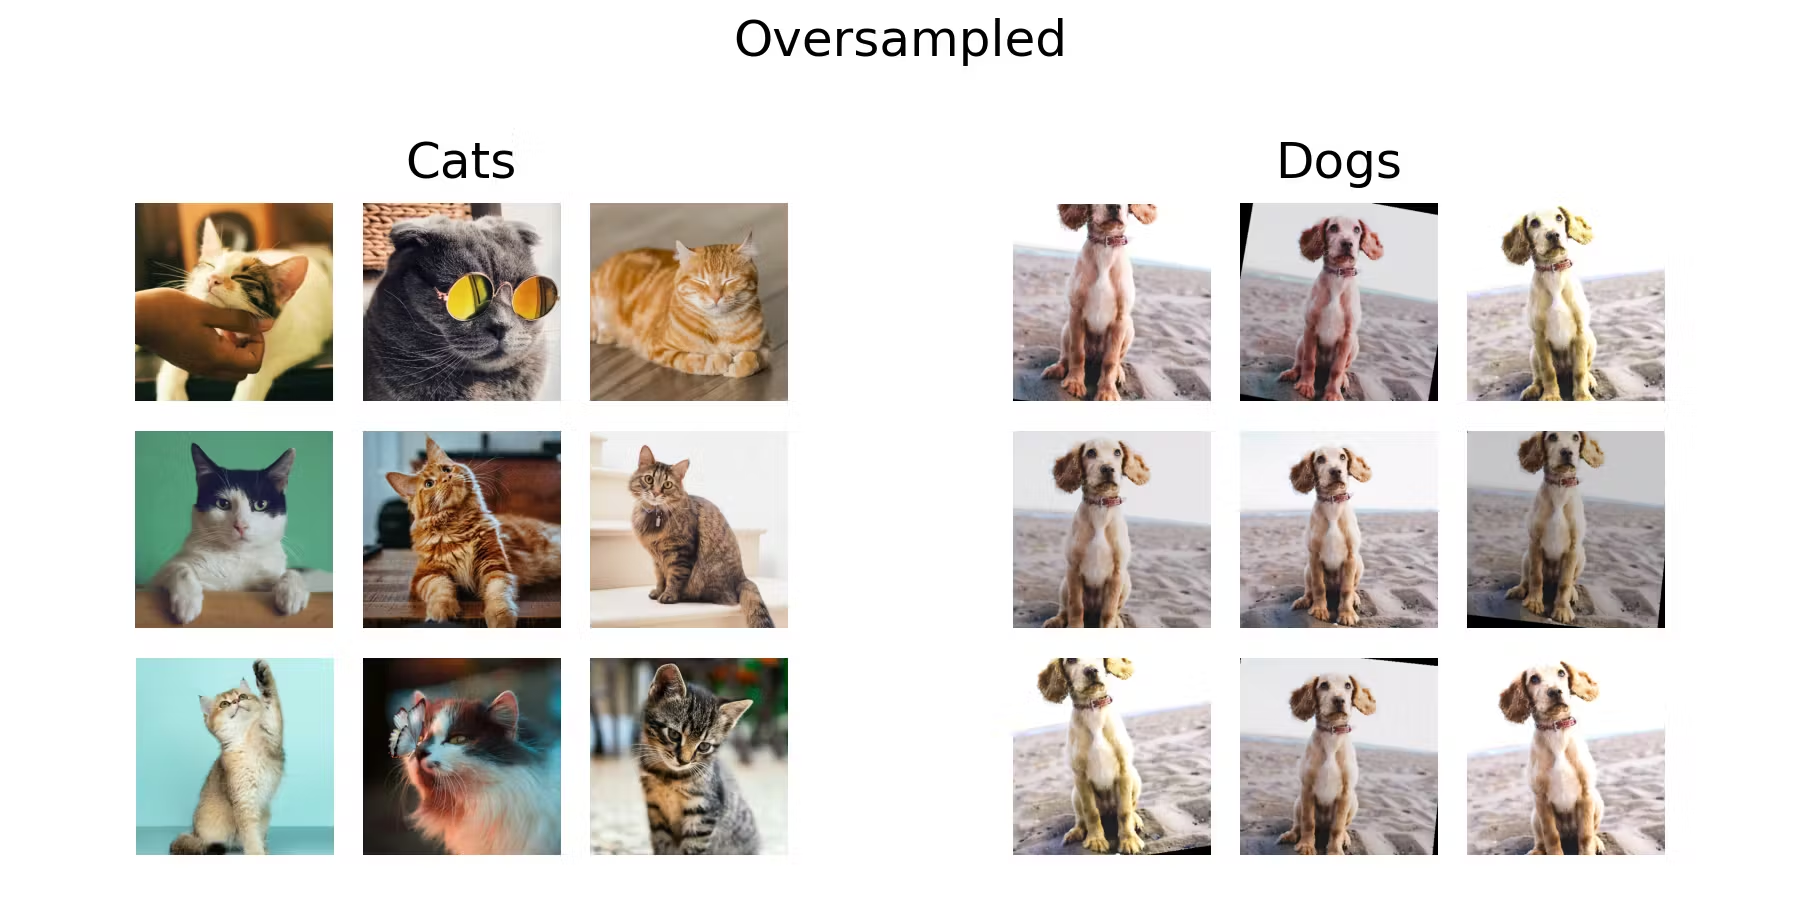

### Три выборки в машинном обучении

В машинном обучении принято разделять данные на три независимые выборки:

- **Обучающая выборка (Training set)** - данные, на которых модель непосредственно обучается (60-80% данных)
- **Валидационная выборка (Validation set)** - данные для подбора гиперпараметров и контроля переобучения (10-20% данных)
- **Тестовая выборка (Test set)** - данные для финальной оценки качества модели, которые нейронка ранее не видела (10-20% данных)

In [4]:
# Создаем мешок слов (Bag of Words)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(reviews)

# Преобразуем в плотный массив и затем в тензор PyTorch
X_dense = X.toarray()
print(f"\nРазмерность данных: {X_dense.shape}")
print(f"Слова в словаре: {vectorizer.get_feature_names_out()}")

# Разделяем данные на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(
    X_dense, labels, test_size=0.3, random_state=42, stratify=labels
)

# Преобразуем в тензоры PyTorch
X_train_tensor = torch.FloatTensor(X_train)
X_test_tensor = torch.FloatTensor(X_test)
y_train_tensor = torch.LongTensor(y_train)
y_test_tensor = torch.LongTensor(y_test)

print(f"\nОбучающая выборка: {X_train_tensor.shape}")
print(f"Тестовая выборка: {X_test_tensor.shape}")


Размерность данных: (10, 37)
Слова в словаре: ['больше' 'быстрая' 'великолепно' 'всем' 'денег' 'деньги' 'доволен'
 'долго' 'доставка' 'ждал' 'заказ' 'зря' 'качество' 'кошмарный' 'не'
 'недоволен' 'некачественный' 'никогда' 'отлично' 'отличный' 'очень'
 'плохая' 'покупка' 'потратил' 'прекрасный' 'продукт' 'работает'
 'разочарован' 'рекомендую' 'своих' 'сервис' 'советую' 'спасибо' 'стоит'
 'супер' 'товар' 'ужасное']

Обучающая выборка: torch.Size([7, 37])
Тестовая выборка: torch.Size([3, 37])


1. **`CountVectorizer()`** создает словарь уникальных слов
2. **`fit_transform()`** обучается на текстах и преобразует их в матрицу частот
3. Каждая строка матрицы - вектор документа
4. Каждый столбец - частота конкретного слова

**Разделение данных:**
- `test_size=0.3` - 30% данных идет в тестовую выборку
- `stratify=labels` - сохраняет распределение классов в выборках
- `random_state=42` - для воспроизводимости результатов

1. Измените `test_size` на 0.2 и 0.4. Как это повлияет на качество?
2. Попробуйте другие методы векторизации: `TfidfVectorizer`
3. Изучите параметры `CountVectorizer`: `max_features`, `stop_words`

### 4. PyTorch

**PyTorch** - фреймворк для глубокого обучения

- `torch.Tensor` - многомерные массивы с поддержкой GPU
- `nn.Module` - базовый класс для всех нейросетевых модулей

**Архитектура нашей нейронной сети:**
```
Вход (37 признаков)
Полносвязный слой (64 нейрона)
ReLU
Dropout
Выход (2 класса)
```

In [5]:
class TextClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(TextClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.dropout(out)
        out = self.fc2(out)
        return out

# Параметры модели
input_size = X_train_tensor.shape[1]  # количество слов в словаре
hidden_size = 64
num_classes = 2  # два класса: позитивный и негативный

# Создаем модель
model = TextClassifier(input_size, hidden_size, num_classes)
print(f"\nМодель создана:")
print(model)


Модель создана:
TextClassifier(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=64, out_features=2, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


**`nn.Linear(input_size, hidden_size)`** - полносвязный слой:
- Преобразует входной вектор размерности `input_size` в вектор размерности `hidden_size`
- Выполняет операцию: `y = xW^T + b`

**`nn.ReLU()`** - функция активации:
- `ReLU(x) = max(0, x)`
- Добавляет нелинейность в модель
- Помогает бороться с проблемой затухающих градиентов

**`nn.Dropout(0.3)`** - регуляризация:
- Случайно "выключает" 30% нейронов во время обучения
- Предотвращает переобучение
- Заставляет сеть учить более robust features

1. Измените архитектуру: добавьте еще один скрытый слой
2. Поэкспериментируйте с размером hidden_size (32, 128, 256)
3. Попробуйте разные функции активации: `nn.Sigmoid()`, `nn.Tanh()`

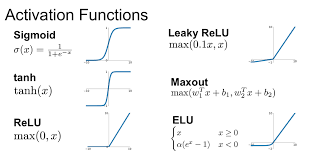

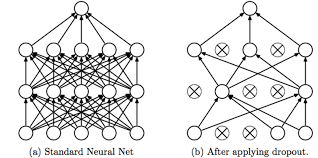

### 5. Процесс обучения нейронной сети

**Прямое распространение (Forward pass):**
- Данные проходят через слои сети
- Вычисляется выходное значение
- Сравнивается с метками через функцию потерь

**Обратное распространение (Backward pass):**
- Вычисляются градиенты функции потерь по параметрам
- Градиенты показывают направление функции потерь

In [6]:
# Функция для вычисления точности
def calculate_accuracy(model, X, y):
    with torch.no_grad():
        outputs = model(X)
        _, predicted = torch.max(outputs.data, 1)
        accuracy = (predicted == y).float().mean()
    return accuracy.item()

# Параметры обучения
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
num_epochs = 100

# Списки для хранения истории обучения
train_losses = []
train_accuracies = []

print("\nНачинаем обучение...")
for epoch in range(num_epochs):
    # Прямой проход
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)

    # Обратный проход и оптимизация
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Вычисляем точность
    train_accuracy = calculate_accuracy(model, X_train_tensor, y_train_tensor)

    train_losses.append(loss.item())
    train_accuracies.append(train_accuracy)

    if (epoch + 1) % 20 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Accuracy: {train_accuracy:.4f}')

print("Обучение завершено!")


Начинаем обучение...
Epoch [20/100], Loss: 0.5969, Accuracy: 0.8571
Epoch [40/100], Loss: 0.4842, Accuracy: 1.0000
Epoch [60/100], Loss: 0.3888, Accuracy: 1.0000
Epoch [80/100], Loss: 0.2798, Accuracy: 1.0000
Epoch [100/100], Loss: 0.1716, Accuracy: 1.0000
Обучение завершено!


**Функция потерь `CrossEntropyLoss`:**
- Используется для задач многоклассовой классификации
- Вычисляет разницу между распределением предсказаний и истинных меток

**Оптимизатор `Adam`:**
- Adaptive Moment Estimation
- Автоматически настраивает learning rate для каждого параметра

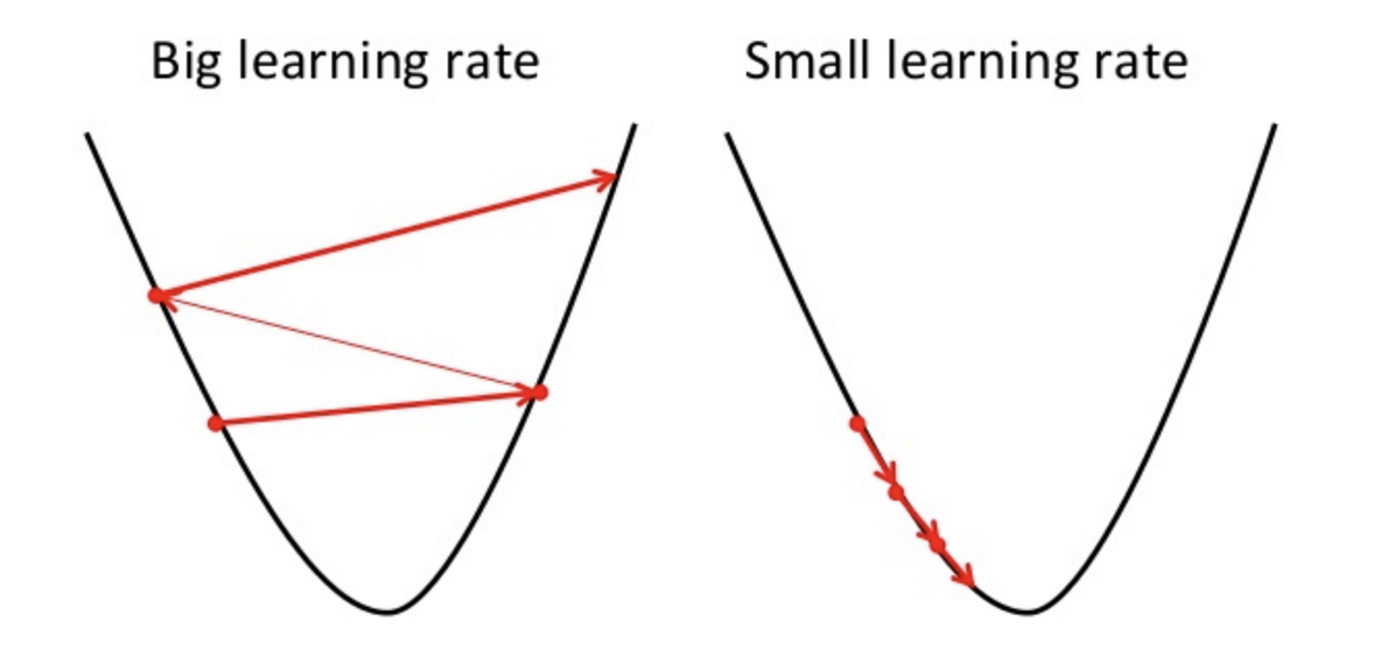

**Цикл обучения:**
1. Вычисление предсказаний и функции потерь
2. Обнуление градиентов: `optimizer.zero_grad()`
3. Обратное распространение
4. Шаг оптимизатора: `optimizer.step()` - обновление весов

1. Измените learning rate (0.01, 0.0001). Как это влияет на сходимость?
2. Попробуйте другие оптимизаторы: `optim.SGD`, `optim.RMSprop`

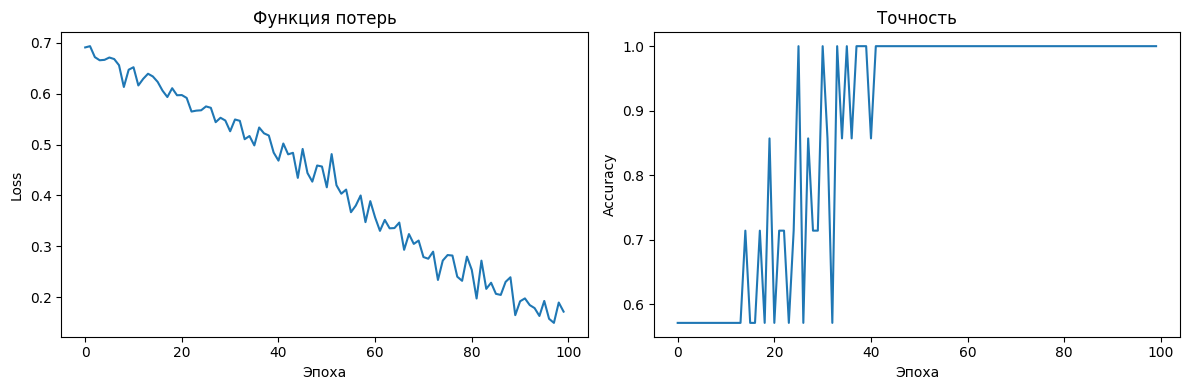

In [7]:
# Графики обучения
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(train_losses)
plt.title('Функция потерь')
plt.xlabel('Эпоха')
plt.ylabel('Loss')

plt.subplot(1, 2, 2)
plt.plot(train_accuracies)
plt.title('Точность')
plt.xlabel('Эпоха')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

**Идеальный сценарий:**
- Loss монотонно уменьшается
- Accuracy монотонно увеличивается
- Оба графика выходят на плато

**Признаки переобучения:**
- Train loss продолжает уменьшаться, но validation loss начинает расти
- Большой разрыв между train и validation accuracy

**Признаки недообучения:**
- Loss и accuracy почти не меняются
- Низкие значения accuracy на обеих выборках

In [8]:
# Оценка на тестовых данных
model.eval()  # Переводим модель в режим оценки
with torch.no_grad():
    test_outputs = model(X_test_tensor)
    _, test_predicted = torch.max(test_outputs.data, 1)
    test_accuracy = (test_predicted == y_test_tensor).float().mean()

print(f"\nТочность на тестовых данных: {test_accuracy:.4f}")

# Детальная информация по тестовым примерам
print("\nПредсказания на тестовых данных:")
for i, (true_label, pred_label) in enumerate(zip(y_test, test_predicted)):
    review_idx = np.where((X_dense == X_test[i]).all(axis=1))[0][0]
    original_review = reviews[review_idx]
    print(f"Отзыв: '{original_review}'")
    print(f"  Истинный класс: {'Позитивный' if true_label == 1 else 'Негативный'}")
    print(f"  Предсказанный: {'Позитивный' if pred_label == 1 else 'Негативный'}")
    print()


Точность на тестовых данных: 0.3333

Предсказания на тестовых данных:
Отзыв: 'ужасное качество не рекомендую'
  Истинный класс: Негативный
  Предсказанный: Позитивный

Отзыв: 'некачественный товар разочарован'
  Истинный класс: Негативный
  Предсказанный: Позитивный

Отзыв: 'супер быстрая доставка'
  Истинный класс: Позитивный
  Предсказанный: Позитивный



**`model.eval()`** - режим оценки:
- Отключает Dropout и BatchNorm в режиме инференса
- Влияет только на определенные слои

**`with torch.no_grad()`** - отключение вычисления градиентов:
- Экономит память и ускоряет вычисления
- Не нужны градиенты во время предсказания

In [9]:
# Функция для предсказания на новых текстах
def predict_sentiment(text, model, vectorizer):
    # Векторизуем текст
    text_vector = vectorizer.transform([text]).toarray()
    text_tensor = torch.FloatTensor(text_vector)

    # Предсказание
    model.eval()
    with torch.no_grad():
        output = model(text_tensor)
        _, predicted = torch.max(output, 1)

    sentiment = "Позитивный" if predicted.item() == 1 else "Негативный"
    confidence = torch.softmax(output, dim=1)[0][predicted.item()].item()

    return sentiment, confidence

# Тестируем на новых отзывах
test_reviews = [
    "очень хороший продукт",
    "не понравилось качество",
    "отличная работа",
    "плохой сервис"
]

print("Предсказания для новых отзывов:")
for review in test_reviews:
    sentiment, confidence = predict_sentiment(review, model, vectorizer)
    print(f"'{review}' -> {sentiment} (уверенность: {confidence:.3f})")

Предсказания для новых отзывов:
'очень хороший продукт' -> Позитивный (уверенность: 0.722)
'не понравилось качество' -> Позитивный (уверенность: 0.594)
'отличная работа' -> Позитивный (уверенность: 0.569)
'плохой сервис' -> Позитивный (уверенность: 0.513)


1. Проанализируйте, какие примеры классифицируются неправильно
2. Добавьте обработку текста (приведение к нижнему регистру, стемминг)


**`torch.softmax()`** - преобразует выходы в вероятности:
- Сумма вероятностей по всем классам равна 1
- Позволяет интерпретировать уверенность модели

**Проблемы с Out-of-Vocabulary словами:**
- Модель не видела слова "нравится", "продукт" в обучении
- CountVectorizer игнорирует неизвестные слова

**Анализ уверенности модели:**
- Низкие значения confidence (< 0.7) указывают на неуверенность
- Модель плохо обобщает новые данные

In [10]:
# Сохраняем модель
torch.save(model.state_dict(), 'text_classifier.pth')
print("\nМодель сохранена в файл 'text_classifier.pth'")

# Сохраняем векторизатор
import pickle
with open('vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)
print("Векторизатор сохранен в файл 'vectorizer.pkl'")

# Пример загрузки модели
def load_model(vectorizer_path, model_path, input_size, hidden_size, num_classes):
    # Загружаем векторизатор
    with open(vectorizer_path, 'rb') as f:
        vectorizer = pickle.load(f)

    # Создаем модель и загружаем веса
    model = TextClassifier(input_size, hidden_size, num_classes)
    model.load_state_dict(torch.load(model_path))

    return model, vectorizer

# Загружаем модель (пример)
# loaded_model, loaded_vectorizer = load_model('vectorizer.pkl', 'text_classifier.pth', input_size, hidden_size, num_classes)


Модель сохранена в файл 'text_classifier.pth'
Векторизатор сохранен в файл 'vectorizer.pkl'


**`model.state_dict()`** - словарь параметров модели:
- Содержит веса и смещения всех слоев
- Не включает архитектуру модели